# Pandas Assignment

## PART 1:

HOW TO CLEAN DATA WITH PYTHON Cleaning US Census Data You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

Inspect the Data! 

### 1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.
### Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob

In [91]:
%matplotlib notebook

### 2.  It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

### Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [92]:
files = glob('states*')
files

['states7.csv',
 'states1.csv',
 'states9.csv',
 'states8.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states0.csv',
 'states2.csv']

In [93]:
us_census = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,$49655.24846625767,5662893M_5913084F
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,$48100.85426653883,1906944M_1942789F
2,2,Oregon,3939233,11.441212121212132%,78.39551515151517%,1.730787878787877%,1.0002424242424257%,3.594909090909088%,0.3453333333333332%,$54271.90181818182,1948453M_1990780F
3,3,Pennsylvania,12779559,6.128013741411624%,77.38385384134914%,11.633947532791995%,0.11926920674578385%,2.7977514053716495%,0.019394128669581522%,$56170.46451005025,6245344M_6534215F
4,4,Puerto Rico,3583073,98.89357384441935%,0.7736189402480265%,0.0925591882750846%,0.0028184892897406984%,0.07519729425028186%,0.0012401352874859078%,$20720.538285714287,1713860M_1869213F
5,5,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [94]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.3+ KB


### 3. Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [13]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [14]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

### 4.  Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

### Start to make a plan for how to convert these columns into the right types for manipulation. 

In [15]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,$49655.24846625767,5662893M_5913084F
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,$48100.85426653883,1906944M_1942789F
2,2,Oregon,3939233,11.441212121212132%,78.39551515151517%,1.730787878787877%,1.0002424242424257%,3.594909090909088%,0.3453333333333332%,$54271.90181818182,1948453M_1990780F
3,3,Pennsylvania,12779559,6.128013741411624%,77.38385384134914%,11.633947532791995%,0.11926920674578385%,2.7977514053716495%,0.019394128669581522%,$56170.46451005025,6245344M_6534215F
4,4,Puerto Rico,3583073,98.89357384441935%,0.7736189402480265%,0.0925591882750846%,0.0028184892897406984%,0.07519729425028186%,0.0012401352874859078%,$20720.538285714287,1713860M_1869213F


In [16]:
us_census.Income = us_census.Income.str.replace("$","",regex = True)
us_census.Income

0      49655.24846625767
1      48100.85426653883
2      54271.90181818182
3      56170.46451005025
4     20720.538285714287
5     59125.270833333336
6     64657.801787164906
7       76146.5605875153
8      61827.97663551402
9      75466.36363636363
10    50690.194986743794
11     50811.08205128205
12     63488.91780821918
13     55602.96721311475
14     72866.01341201717
15     64493.76768377254
16     41437.11157024794
17    53898.889208633096
18    59125.270833333336
19    46296.807763401106
20     51805.40540540541
21    47328.083616587355
22    55874.522600500095
23     63488.91780821918
24     53017.75304136253
25    53885.612648221344
26     45285.80253623189
27     44957.99376114082
28     49181.97435897436
29     78765.40072463769
30     78765.40072463769
31     72838.93672627235
32     51201.83003663004
33       62820.833959429
34     38909.91920731707
35     49763.98772563177
36     49763.98772563177
37    47645.682835820895
38    55916.469696969696
39    55526.525073746314


### Regex to the Rescue 
### 5. Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [17]:
us_census.Income = pd.to_numeric(us_census.Income)
us_census.Income

0     49655.248466
1     48100.854267
2     54271.901818
3     56170.464510
4     20720.538286
5     59125.270833
6     64657.801787
7     76146.560588
8     61827.976636
9     75466.363636
10    50690.194987
11    50811.082051
12    63488.917808
13    55602.967213
14    72866.013412
15    64493.767684
16    41437.111570
17    53898.889209
18    59125.270833
19    46296.807763
20    51805.405405
21    47328.083617
22    55874.522601
23    63488.917808
24    53017.753041
25    53885.612648
26    45285.802536
27    44957.993761
28    49181.974359
29    78765.400725
30    78765.400725
31    72838.936726
32    51201.830037
33    62820.833959
34    38909.919207
35    49763.987726
36    49763.987726
37    47645.682836
38    55916.469697
39    55526.525074
40    68728.859589
41    76581.083417
42    76581.083417
43    47329.967871
44    64290.749113
45    49937.464137
46    58188.112195
47    49655.248466
48    43296.358603
49    70354.743902
50    54207.820955
51    41935.633968
52    67264.

### 6.  Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

### Split the column into those two new columns using str.split and separating out those results.

In [43]:
us_census[["Men_column", "Women_column"]] = us_census.GenderPop.str.split("_",expand = True)
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men_column,Women_column
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,49655.248466,5662893M_5913084F,5662893M,5913084F
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,48100.854267,1906944M_1942789F,1906944M,1942789F
2,2,Oregon,3939233,11.441212121212132%,78.39551515151517%,1.730787878787877%,1.0002424242424257%,3.594909090909088%,0.3453333333333332%,54271.901818,1948453M_1990780F,1948453M,1990780F
3,3,Pennsylvania,12779559,6.128013741411624%,77.38385384134914%,11.633947532791995%,0.11926920674578385%,2.7977514053716495%,0.019394128669581522%,56170.464510,6245344M_6534215F,6245344M,6534215F
4,4,Puerto Rico,3583073,98.89357384441935%,0.7736189402480265%,0.0925591882750846%,0.0028184892897406984%,0.07519729425028186%,0.0012401352874859078%,20720.538286,1713860M_1869213F,1713860M,1869213F
5,5,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833,510388M_543273F,510388M,543273F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607M,1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413M,478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674M,340810F


### 7. Convert both of the columns into numerical datatypes.

### There is still an M or an F character in each entry! We should remove those before we convert.

In [44]:
us_census.Women_column = us_census.Women_column.str.replace("F","")
us_census.Women_column = pd.to_numeric(us_census.Women_column)

In [45]:
us_census.Men_column = us_census.Men_column.str.replace("M","")
us_census.Men_column = pd.to_numeric(us_census.Men_column)

In [46]:
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men_column,Women_column
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,49655.248466,5662893M_5913084F,5662893,5913084.0
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,48100.854267,1906944M_1942789F,1906944,1942789.0
2,2,Oregon,3939233,11.441212121212132%,78.39551515151517%,1.730787878787877%,1.0002424242424257%,3.594909090909088%,0.3453333333333332%,54271.901818,1948453M_1990780F,1948453,1990780.0
3,3,Pennsylvania,12779559,6.128013741411624%,77.38385384134914%,11.633947532791995%,0.11926920674578385%,2.7977514053716495%,0.019394128669581522%,56170.464510,6245344M_6534215F,6245344,6534215.0
4,4,Puerto Rico,3583073,98.89357384441935%,0.7736189402480265%,0.0925591882750846%,0.0028184892897406984%,0.07519729425028186%,0.0012401352874859078%,20720.538286,1713860M_1869213F,1713860,1869213.0
5,5,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833,510388M_543273F,510388,543273.0
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0


### 8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

### Use matplotlib to make a scatterplot!

### plt.scatter(the_women_column, the_income_column) Remember to call plt.show() to see the graph!

<IPython.core.display.Javascript object>


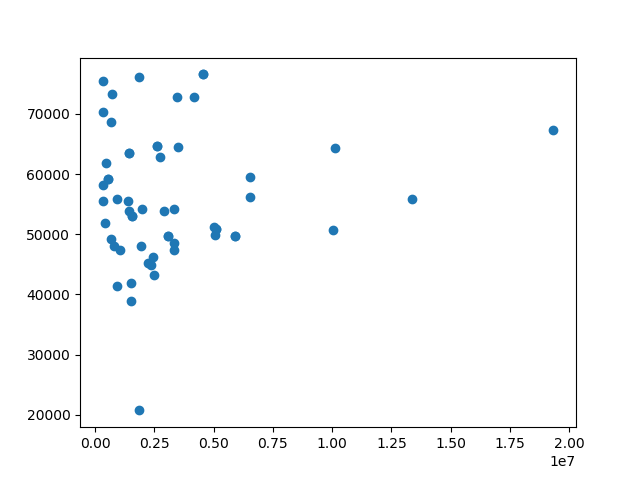

In [47]:
fig = plt.figure()
plt.scatter(us_census.Women_column, us_census.Income)
plt.show()

### 9. Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

### We can fill in those nans by using pandas’ .fillna() function.

### You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

### Print out the Women column after filling the nan values to see if it worked!

In [50]:
us_census.Women_column = us_census.Women_column.fillna(us_census.TotalPop - us_census.Men_column).astype(int)
us_census.Women_column

0      5913084
1      1942789
2      1990780
3      6534215
4      1869213
5       543273
6      2630239
7      1841615
8       478041
9       340810
10    10045763
11     5123362
12     1444150
13      318031
14     4195682
15     3497739
16      937789
17     2890732
18      543273
19     2455167
20      419713
21     3331859
22    13367298
23     1444150
24     1558931
25     1453125
26     2233145
27     2364097
28      679019
29     3057895
30     3057895
31     3455936
32     5038598
33     2727005
34     1536358
35     3081445
36     3081445
37      504536
38      939759
39     1390901
40      670717
41     4561386
42     4561386
43     1051703
44    10131373
45     5049925
46      353677
47     5913084
48     2489527
49      349215
50     3342840
51     1506295
52    19334329
53     2630239
54     5123362
55      696428
56      806083
57     6556862
58     3333382
59     1558931
Name: Women_column, dtype: int64

### 10. We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [51]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [53]:
us_census.count()

Unnamed: 0      60
State           60
TotalPop        60
Hispanic        60
White           60
Black           60
Native          60
Asian           60
Pacific         55
Income          60
GenderPop       60
Men_column      60
Women_column    60
dtype: int64

### 11. Drop those duplicates using the .drop_duplicates() function.

In [56]:
us_census.drop_duplicates(inplace= True)

In [57]:
us_census.count()

Unnamed: 0      60
State           60
TotalPop        60
Hispanic        60
White           60
Black           60
Native          60
Asian           60
Pacific         55
Income          60
GenderPop       60
Men_column      60
Women_column    60
dtype: int64

### 12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

<IPython.core.display.Javascript object>


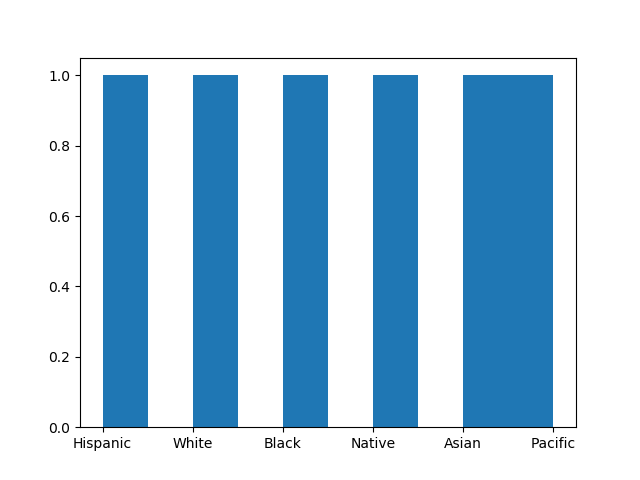

In [58]:
fig = plt.figure()
plt.scatter(us_census.Women_column, us_census.Income)
plt.show()

### Histograms of Races 
### 13. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [59]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60 non-null     int64  
 1   State         60 non-null     object 
 2   TotalPop      60 non-null     int64  
 3   Hispanic      60 non-null     object 
 4   White         60 non-null     object 
 5   Black         60 non-null     object 
 6   Native        60 non-null     object 
 7   Asian         60 non-null     object 
 8   Pacific       55 non-null     object 
 9   Income        60 non-null     float64
 10  GenderPop     60 non-null     object 
 11  Men_column    60 non-null     int64  
 12  Women_column  60 non-null     int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 6.6+ KB


In [60]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men_column,Women_column
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,49655.248466,5662893M_5913084F,5662893,5913084
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,48100.854267,1906944M_1942789F,1906944,1942789
2,2,Oregon,3939233,11.441212121212132%,78.39551515151517%,1.730787878787877%,1.0002424242424257%,3.594909090909088%,0.3453333333333332%,54271.901818,1948453M_1990780F,1948453,1990780
3,3,Pennsylvania,12779559,6.128013741411624%,77.38385384134914%,11.633947532791995%,0.11926920674578385%,2.7977514053716495%,0.019394128669581522%,56170.464510,6245344M_6534215F,6245344,6534215
4,4,Puerto Rico,3583073,98.89357384441935%,0.7736189402480265%,0.0925591882750846%,0.0028184892897406984%,0.07519729425028186%,0.0012401352874859078%,20720.538286,1713860M_1869213F,1713860,1869213


In [63]:
def remove_sign(name):
    us_census[name] = us_census[name].str.replace("%","").astype(float)

In [64]:
remove_sign("Hispanic")
remove_sign("White")
remove_sign("Black")
remove_sign("Native")
remove_sign("Asian")
remove_sign("Pacific")

In [65]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men_column,Women_column
0,0,Ohio,11575977,3.672084,75.903060,16.207276,0.168888,1.621081,0.022645,49655.248466,5662893M_5913084F,5662893,5913084
1,1,Oklahoma,3849733,10.079904,66.059426,8.314737,6.716842,1.801148,0.106220,48100.854267,1906944M_1942789F,1906944,1942789
2,2,Oregon,3939233,11.441212,78.395515,1.730788,1.000242,3.594909,0.345333,54271.901818,1948453M_1990780F,1948453,1990780
3,3,Pennsylvania,12779559,6.128014,77.383854,11.633948,0.119269,2.797751,0.019394,56170.464510,6245344M_6534215F,6245344,6534215
4,4,Puerto Rico,3583073,98.893574,0.773619,0.092559,0.002818,0.075197,0.001240,20720.538286,1713860M_1869213F,1713860,1869213


### 14. Try to make a histogram for each one!

### You will have to get the columns into numerical format, and those percentage signs will have to go.

### Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [66]:
us_census.isnull().sum()

Unnamed: 0      0
State           0
TotalPop        0
Hispanic        0
White           0
Black           0
Native          0
Asian           0
Pacific         5
Income          0
GenderPop       0
Men_column      0
Women_column    0
dtype: int64

In [67]:
def fill(Name):
  us_census[Name] = us_census[Name].fillna(us_census[Name].mean())
fill("Pacific")

In [68]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [76]:
cols = ["Hispanic","White","Black","Native","Asian","Pacific"]
plt.hist(cols,bins=12)

(array([1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([0.        , 0.41666667, 0.83333333, 1.25      , 1.66666667,
        2.08333333, 2.5       , 2.91666667, 3.33333333, 3.75      ,
        4.16666667, 4.58333333, 5.        ]),
 <a list of 12 Patch objects>)

<IPython.core.display.Javascript object>


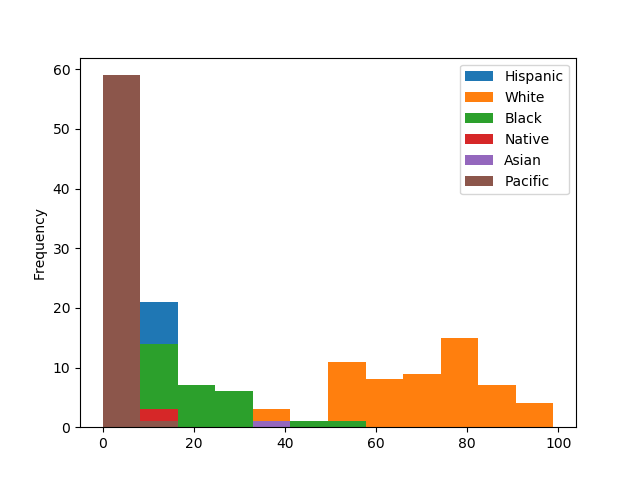

In [83]:
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].plot.hist(bins=12)

In [78]:
us_census.count()

Unnamed: 0      60
State           60
TotalPop        60
Hispanic        60
White           60
Black           60
Native          60
Asian           60
Pacific         60
Income          60
GenderPop       60
Men_column      60
Women_column    60
dtype: int64

### Get Creative 
### 15. Phew. You’ve definitely impressed your boss on your first day of work.
### But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

### Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

<IPython.core.display.Javascript object>


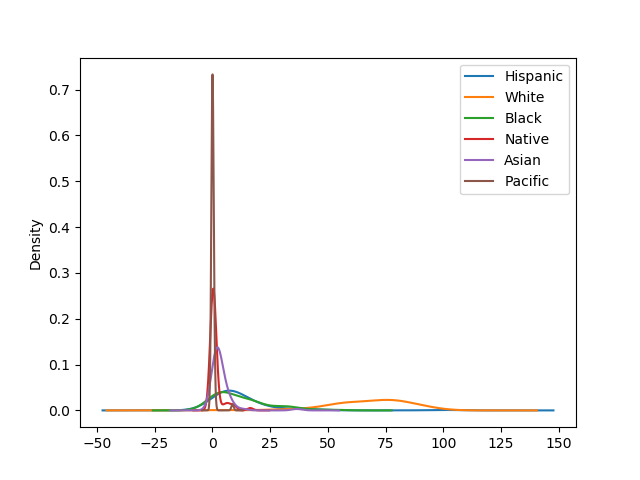

In [84]:
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].plot.density()
plt.show()

<IPython.core.display.Javascript object>


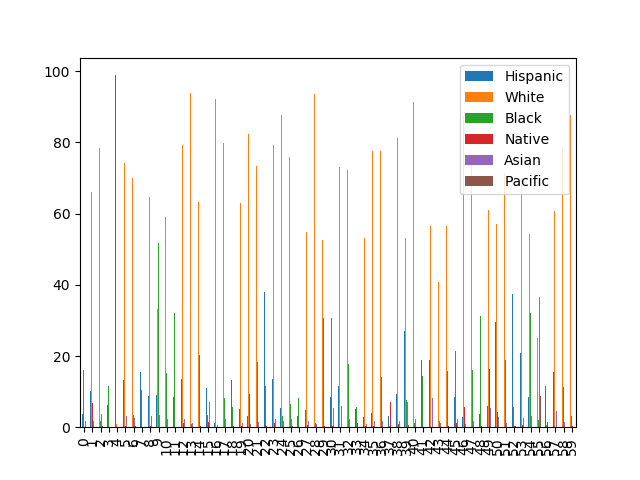

In [89]:
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].plot.bar()
plt.show()

## PART 2:

LEARN DATA ANALYSIS WITH PANDAS Petal Power Inventory You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!

### Answer Customer Emails 
### 1. Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.



In [96]:
garden = pd.read_csv("inventory.csv")
garden

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


### 2. Inspect the first 10 rows of inventory.



In [97]:
garden.iloc[0:10]

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


### 3. The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [99]:
staten_island = garden.head(10)
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


### 4. A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [100]:
product_request = staten_island.product_description
product_request 

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

### 5. Another customer emails to ask what types of seeds are sold at the Brooklyn location.

### Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [101]:
Brooklyn_loc = garden[garden.location == "Brooklyn"]
Brooklyn_loc

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99
13,Brooklyn,garden tools,rake,15,13.99
14,Brooklyn,garden tools,wheelbarrow,82,89.99
15,Brooklyn,garden tools,spade,36,19.99
16,Brooklyn,pest_control,insect killer,80,12.99
17,Brooklyn,pest_control,weed killer,76,23.99
18,Brooklyn,planter,20 inch terracotta planter,5,17.99
19,Brooklyn,planter,8 inch plastic planter,26,3.99


In [102]:
seed_request = garden[(garden.location == "Brooklyn") & (garden.product_type == "seeds")]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


### Inventory 
### 6. Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [103]:
garden["in_stock"] = garden.quantity > 0

In [104]:
garden.in_stock

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27     True
28     True
Name: in_stock, dtype: bool

In [105]:
garden

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


### 7. Petal Power wants to know how valuable their current inventory is.

### Create a column called total_value that is equal to price multiplied by quantity.

In [106]:
garden["total_value"]  = garden.price * garden.quantity

In [107]:
garden.total_value

0       27.96
1      919.54
2     1189.15
3       55.96
4        0.00
5     1859.07
6      961.26
7      191.92
8        0.00
9      211.47
10     349.50
11       0.00
12       0.00
13     209.85
14    7379.18
15     719.64
16    1039.20
17    1823.24
18      89.95
19     103.74
20     398.43
21    1899.05
22     629.55
23     293.79
24    8819.02
25     519.74
26       0.00
27     383.84
28    1565.13
Name: total_value, dtype: float64

In [108]:
garden

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


### 8. The Marketing department wants a complete description of each product for their catalog.

### The following lambda function combines product_type and product_description into a single string:

### combine_lambda = lambda row: \ '{} - {}'.format(row.product_type, row.product_description) Paste this function into script.py.

In [109]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type, row.product_description)

### 9. Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.

In [112]:
garden["full_description"] = garden.apply(combine_lambda,axis=1)
garden

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter


In [114]:
garden.full_description

0                            seeds - daisy
1                       seeds - calla lily
2                           seeds - tomato
3                      garden tools - rake
4               garden tools - wheelbarrow
5                     garden tools - spade
6             pest_control - insect killer
7               pest_control - weed killer
8     planter - 20 inch terracotta planter
9         planter - 8 inch plastic planter
10                           seeds - daisy
11                      seeds - calla lily
12                          seeds - tomato
13                     garden tools - rake
14              garden tools - wheelbarrow
15                    garden tools - spade
16            pest_control - insect killer
17              pest_control - weed killer
18    planter - 20 inch terracotta planter
19        planter - 8 inch plastic planter
20                           seeds - daisy
21                      seeds - calla lily
22                          seeds - tomato
23         

In [115]:
garden.count()

location               29
product_type           29
product_description    29
quantity               29
price                  29
in_stock               29
total_value            29
full_description       29
dtype: int64